In [103]:
f = open('input-20.txt','r')
dat = f.readlines()
f.close()

In [127]:
dat

['                               L       S     F Z     O     X     Q     W                                   \n',
 '                               T       S     P Z     J     J     X     L                                   \n',
 '  #############################.#######.#####.#.#####.#####.#####.#####.#################################  \n',
 '  #.#.....#.....#.#.#.#.....#.....#.#.......#...#.....#.#...#.#.#.#.......#...#.#.#...#.#...#.#...#.#.#.#  \n',
 '  #.###.#.###.###.#.#.###.#####.###.###.#.#####.###.###.#.###.#.#.#####.###.#.#.#.#.###.#.###.#.#.#.#.#.#  \n',
 '  #.....#.#...#.#.....#.#...#.....#.#.#.#.#...#.#.....#.......#...#...#.....#.#.............#.#.#.....#.#  \n',
 '  #######.###.#.#.#####.###.#.#####.#.###.#.#.#.#####.#.#.#.#.#.#.#.###.#####.#.#.#########.#.#.#######.#  \n',
 '  #...#.....#.....#...#.........#.......#.#.#.....#...#.#.#.#.#.#.#...#.#.......#.........#.......#.....#  \n',
 '  #.#######.#####.###.#########.###.###.#.#.#######.#.###.###.###.###.#.#.#####.#.####

In [105]:
from collections import defaultdict

grid = defaultdict(list)
for i,line in enumerate(dat):
    for char in line.replace('\n',''):
        grid[i].append(char)

In [106]:
letters = 'QWERTYUIOPASDFGHJKLZXCVBNM'

In [107]:
'A' in letters

True

In [108]:
'.'.isalpha()

False

In [117]:
# need to link all paths 
# and make lookup for all portals
portals = dict()
edgesize = 25
#edgesize = 6
lengthsize = 108
#lengthsize = 37

for y,line in enumerate(grid.keys()):
    for x,c in enumerate(grid[y]):
        isportal=False
        
        if c =='.' and (grid[y][x+1].isalpha() and grid[y][x+2].isalpha()):
            portname_name = grid[y][x+1]+grid[y][x+2]
            isportal = True
            #print('1',portname_name,x,y)
        elif c =='.' and grid[y][x-1].isalpha() and grid[y][x-2].isalpha():
            portname_name = grid[y][x-2]+grid[y][x-1]
            isportal = True
            #print('2',portname_name)
        elif c =='.' and grid[y-1][x].isalpha() and grid[y-2][x].isalpha():
            portname_name = grid[y-2][x]+grid[y-1][x]
            isportal = True
            #print('3',portname_name)
        elif c =='.' and grid[y+1][x].isalpha() and grid[y+2][x].isalpha():
            portname_name = grid[y+1][x]+grid[y+2][x]
            isportal = True
            #print('4',portname_name)
            
        if isportal and x > edgesize and x< (lengthsize-edgesize) and y>edgesize and y< (lengthsize-edgesize):
            portals[portname_name+'_inner'] = (x,y)
        elif isportal:
            portals[portname_name+'_outer'] = (x,y)

portals

{'LT_outer': (31, 2),
 'SS_outer': (39, 2),
 'FP_outer': (45, 2),
 'ZZ_outer': (47, 2),
 'OJ_outer': (53, 2),
 'XJ_outer': (59, 2),
 'QX_outer': (65, 2),
 'WL_outer': (71, 2),
 'UE_inner': (31, 26),
 'DR_inner': (41, 26),
 'PV_inner': (47, 26),
 'IQ_inner': (49, 26),
 'QX_inner': (63, 26),
 'LT_inner': (69, 26),
 'MX_inner': (75, 26),
 'TI_inner': (80, 31),
 'IQ_outer': (104, 33),
 'TI_outer': (2, 35),
 'WL_inner': (26, 35),
 'UE_outer': (104, 39),
 'OG_outer': (2, 43),
 'OB_inner': (26, 43),
 'VU_inner': (80, 45),
 'ZH_inner': (26, 47),
 'PV_outer': (2, 51),
 'DS_inner': (80, 53),
 'DR_outer': (104, 53),
 'SB_inner': (80, 57),
 'GU_outer': (2, 61),
 'SS_inner': (26, 61),
 'QN_outer': (104, 61),
 'OJ_inner': (80, 63),
 'PO_outer': (104, 63),
 'AA_outer': (2, 65),
 'MX_outer': (2, 69),
 'OQ_inner': (26, 69),
 'QN_inner': (80, 69),
 'MH_outer': (104, 69),
 'MH_inner': (26, 71),
 'PO_inner': (80, 71),
 'YJ_outer': (104, 71),
 'OB_outer': (2, 75),
 'XJ_inner': (35, 80),
 'DC_inner': (37, 8

In [118]:
len(portals)

56

In [119]:
import networkx as nx

In [120]:
graph = nx.Graph()

In [121]:
graph = nx.Graph()
portalcodes = set()
for p in list(portals.keys()):
    portalcodes.add(p[0:2])
    
portalcodes

for pc in portalcodes:
    try:
        graph.add_edge(portals[pc+'_inner'],portals[pc+'_outer'])
    except KeyError:
        pass

In [122]:
# add all the walking parts too
import numpy as np

grid_array = np.zeros((105,105))

for y,m in enumerate(grid.keys()):
    for x,tile in enumerate(grid[m]):
        if tile == '.':
            grid_array[x,y] = 1
            
            if grid[m][x-1] == '.':
                graph.add_edge((x,y), (x-1,y))
            if grid[m][x+1] == '.':
                graph.add_edge((x,y), (x+1,y))
            if grid[m+1][x] == '.':
                graph.add_edge((x,y), (x,y+1))
            if grid[m-1][x] == '.':
                graph.add_edge((x,y), (x,y-1))

In [123]:
#graph.sho (AA_outer to ZZ_outer)

aa_to_zz = nx.shortest_path(graph, portals['AA_outer'], portals['ZZ_outer'])

In [124]:
len(aa_to_zz)-1

498

In [125]:
import matplotlib.pyplot as plt
%matplotlib inline

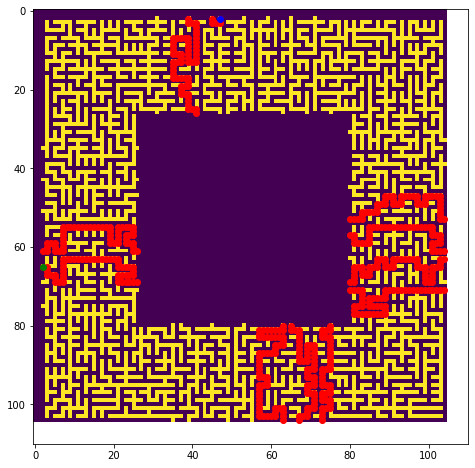

In [126]:
plt.figure(figsize=(8,8))
plt.imshow(grid_array.T)


for x,y in aa_to_zz:
    plt.scatter(x,y,c='r')
    
plt.scatter(portals['AA_outer'][0],portals['AA_outer'][1],c='g')
plt.scatter(portals['ZZ_outer'][0],portals['ZZ_outer'][1],c='b')



In [184]:
# part 2, recursive path

graph = nx.Graph()
portalcodes = set()
for p in list(portals.keys()):
    portalcodes.add(p[0:2])
    
portalcodes.discard('AA')
portalcodes.discard('ZZ')
portalcodes

for n in range(0,150):
    for pc in portalcodes:
        try:
            if n==0:
                graph.add_edge((portals[pc+'_outer'][0],portals[pc+'_outer'][1],n),(portals[pc+'_inner'][0],portals[pc+'_inner'][1],n+1))
            if n>0:
                graph.add_edge((portals[pc+'_outer'][0],portals[pc+'_outer'][1],n),(portals[pc+'_inner'][0],portals[pc+'_inner'][1],n+1))
                graph.add_edge((portals[pc+'_inner'][0],portals[pc+'_inner'][1],n),(portals[pc+'_outer'][0],portals[pc+'_outer'][1],n-1))



        except KeyError:
            pass

In [185]:
import numpy as np

grid_array = np.zeros((105,105))

for layer in range(0,150):
    for y,m in enumerate(grid.keys()):
        for x,tile in enumerate(grid[m]):
            if tile == '.':
                grid_array[x,y] = 1

                if grid[m][x-1] == '.':
                    graph.add_edge((x,y,layer), (x-1,y,layer))
                    graph.add_edge((x-1,y,layer), (x,y,layer))
                if grid[m][x+1] == '.':
                    graph.add_edge((x,y,layer), (x+1,y,layer))
                    graph.add_edge((x+1,y,layer), (x,y,layer))
                if grid[m+1][x] == '.':
                    graph.add_edge((x,y,layer), (x,y+1,layer))
                    graph.add_edge((x,y+1,layer), (x,y,layer))
                if grid[m-1][x] == '.':
                    graph.add_edge((x,y,layer), (x,y-1,layer))
                    graph.add_edge((x,y-1,layer), (x,y,layer))

In [186]:
(portals['AA_outer'][0],portals['AA_outer'][1],0)

(2, 65, 0)

In [187]:
aa_to_zz = nx.shortest_path(graph, (portals['AA_outer'][0],portals['AA_outer'][1],0), (portals['ZZ_outer'][0],portals['ZZ_outer'][1],0))

len(aa_to_zz)-1

4206

In [188]:
#5564